# Week 3 Lab Session: Advertising Data  (22 Oct 2018)

* In this lab session we are going to look at how to answer questions involing the use of simple and multiple linear regression in Python. 

* The questions are based on the book "An introduction to Statistical Learning" by James et al. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
data_advert = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data_advert.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data_advert.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


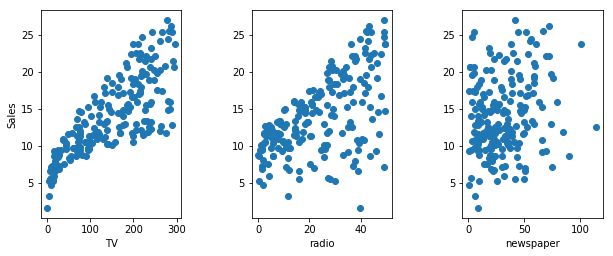

In [5]:
plt.subplot(131)
plt.scatter(data_advert.TV,data_advert.sales)
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(132)
plt.scatter(data_advert.radio,data_advert.sales)
plt.xlabel('radio')

plt.subplot(133)
plt.scatter(data_advert.newspaper,data_advert.sales)
plt.xlabel('newspaper')
plt.subplots_adjust(top=0.8, bottom=0.08, left=0.0, right=1.3, hspace=5, wspace=0.5)

## QUESTION 1: Is there a relationship between advertising sales and budget?

* Test the null hypothesis 
\begin{equation}
H_0: \beta_1=\ldots=\beta_p=0
\end{equation}
versus the alternative
\begin{equation}
H_a: \text{at least one $\beta_j$ is nonzero}
\end{equation}
* For that compute the F-statistic in Multiple Linear Regression 'sales ~ TV+radio+newspaper' using $\texttt{ols}$ from ${\bf Statsmodels}$
* If there is no relationship between the response and predictors, the F-statistic takes values close to 1. If $H_a$ is true, than F-statistic is expected to be significantly greater than 1. Check the associated p-values. 

In [4]:
results = smf.ols('sales ~ TV+radio+newspaper', data=data_advert).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 22 Oct 2018   Prob (F-statistic):           1.58e-96
Time:                        14:50:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

## QUESTION 2: How strong is the relationship?

You should base your discussion on the following quantities:
* $RSE$ - computed using $\texttt{scale}$ atribute: $\texttt{np.sqrt(results.scale)}$
    * Compute the percentage error, i.e. $RSE/(mean sale)$
* $R^2$ - computed using $\texttt{rsquared}$ atribute: $\texttt{results.rsquared}$

In [7]:
𝚗𝚙.𝚜𝚚𝚛𝚝(𝚛𝚎𝚜𝚞𝚕𝚝𝚜.𝚜𝚌𝚊𝚕𝚎) 


1.685510373414744

In [8]:
𝚛𝚎𝚜𝚞𝚕𝚝𝚜.𝚛𝚜𝚚𝚞𝚊𝚛𝚎𝚍

0.8972106381789522

## QUESTION 3: Which media contribute to sales?

* Examine the p-values associated with each predictor’s t-statistic

## QUESTION 4: How large is the effect of each medium on sales?

* Examine 95% confidence intervals associated with each predictor
* Compare your results with three separate simple lineare regression